In [1]:
import numpy as np; import matplotlib.pyplot as plt
import random

In [2]:
def road_init(n, n_cars):
    road = np.zeros(n)
    i=0
    while i<n_cars:
        x = random.randint(0,n-1)
        if road[x]!=1:
            road[x]=1
            i = i+1
    return road


def update_road(road):
    n = np.size(road)
    road_updated = np.zeros(n)
    for i in range(n):
        if ([road[(i-1)%n], road[i%n], road[(i+1)%n]]==[1,1,1] or [road[(i-1)%n], road[i%n], road[(i+1)%n]]==[1,0,1] or
            [road[(i-1)%n], road[i%n], road[(i+1)%n]]==[1,0,0] or [road[(i-1)%n], road[i%n], road[(i+1)%n]]==[0,1,1]):
            road_updated[i] = 1
        else:
            road_updated[i] = 0
    return road_updated

def cal_aver_sp(road_t, n_cars):
    [T, n] = road_t.shape
    D = 0
    for i in range(T-1):
        x = np.sum((road_t[i+1,:]-road_t[i,:])==[1]*n)
        D += x
    v = D/(T-1)/n_cars
    return v

In [7]:
n = 20
n_cars = 10
T = 25


road = road_init(n, n_cars)
road_t = [road]
for t in range(T-1):
    road = update_road(road)
    road_t.append(road)
    
#road_t = np.array(road_t)
#cal_aver_sp(road_t, n_cars)

In [8]:
road_t

[array([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
        1., 0., 1.]),
 array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 0.]),
 array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        1., 0., 1.]),
 array([1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        0., 1., 0.]),
 array([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
        1., 0., 1.]),
 array([1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
        0., 1., 0.]),
 array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 0., 1.]),
 array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0.]),
 array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1.]),
 array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0.]),
 array([0., 1., 0., 

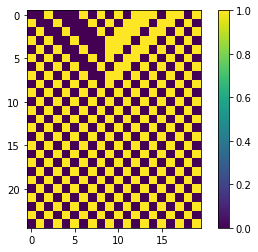

In [9]:
plt.imshow(road_t)
plt.colorbar()
plt.savefig('%d_%d.pdf'%(n,n_cars))

No handles with labels found to put in legend.


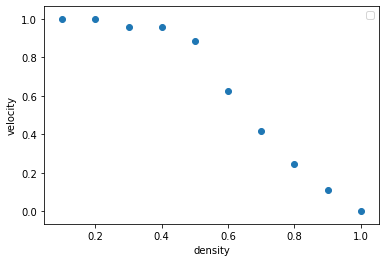

In [142]:
dens = np.linspace(0.1,1,10)
v = [1.0, 1.0, 0.958, 0.958, 0.883, 0.625, 0.417, 0.247, 0.111, 0.0] #f_sites_with_diff_c

plt.scatter(dens, v)
plt.xlabel('density');plt.ylabel('velocity');plt.legend()
plt.savefig('v-dens.pdf')